# Voting in Scikit-Learn
Scikit-Learn provides two classes for creating a voting ensemble:

1. **VotingClassifier** is used for classification problems. It supports both majority and soft voting.
2. **VotingRegressor** is used for regression problems. It averages the predictions of the base regressors to form the final prediction.

In [9]:
from matplotlib.colors import ListedColormap

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons

In [2]:
X, y = make_moons(n_samples=200, noise=0.3, random_state=0)

Text(0, 0.5, '$x_2$')

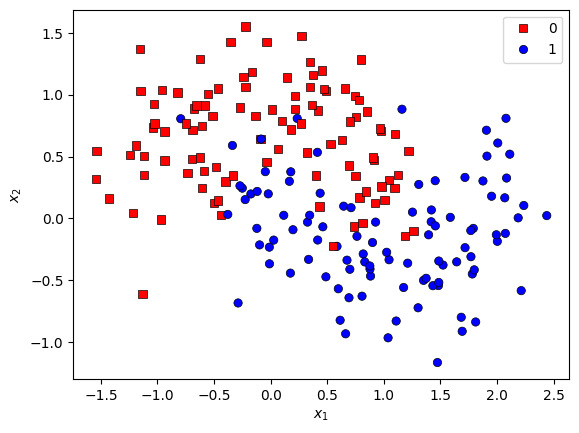

In [5]:
sns.scatterplot(
    x=X[:, 0], 
    y=X[:, 1], 
    hue=y, 
    style=y, 
    palette=['r', 'b'], 
    markers=('s', 'o'), 
    edgecolor='k'
)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Define base classifiers. We will use three classifiers: Logistic Regression, Gaussian Naive Bayes, and Decision Tree.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = DecisionTreeClassifier()

Create our `VotingClassifier`, which gets in its constructor a list of the base classifiers, and the voting method (the default is 'hard').

In [7]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier([('log', clf1), ('knn', clf2), ('dt', clf3)], voting='soft')

Use cross validation with 5 folds to evaluate both the base classifiers and the ensemble.

In [8]:
from sklearn.model_selection import cross_val_score

names = ['Logistic Regression', 'Gaussian NB', 'Decision Tree', 'Ensemble']
classifiers = [clf1, clf2, clf3, ensemble]

for clf, name in zip(classifiers, names):
    scores = cross_val_score(clf, X, y, cv=5)
    print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f}) [{name}]')

Accuracy: 0.830 (+/- 0.051) [Logistic Regression]
Accuracy: 0.840 (+/- 0.046) [Gaussian NB]
Accuracy: 0.850 (+/- 0.035) [Decision Tree]
Accuracy: 0.880 (+/- 0.033) [Ensemble]


We can see that the ensemble has achieved a better result than all the three base classifiers. In addition, it had less variance across the 5 different training sets (and thus was less overfitting the training set).

In [10]:
def plot_decision_boundaries(clf, X, y, feature_names, class_names, ax,
                             colors=['r', 'b'], markers=('s', 'o')):  
    
    cmap = ListedColormap(colors)
      
    # create a mesh of n sample points in the range [x1_min, x1_max] x [x2_min, x2_max]
    n = 1000 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n), np.linspace(x2_min, x2_max, n))
    
    # find the label of each point in the mesh
    y_pred = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    y_pred = y_pred.reshape(x1.shape) 
    
    # put the result into a color plot 
    plt.sca(ax)
    plt.contourf(x1, x2, y_pred, cmap=cmap, alpha=0.4)
    
    # plot the points from the data set
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=class_names[y], style=class_names[y], 
                    palette=colors, markers=markers, edgecolor='k')
    
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()     

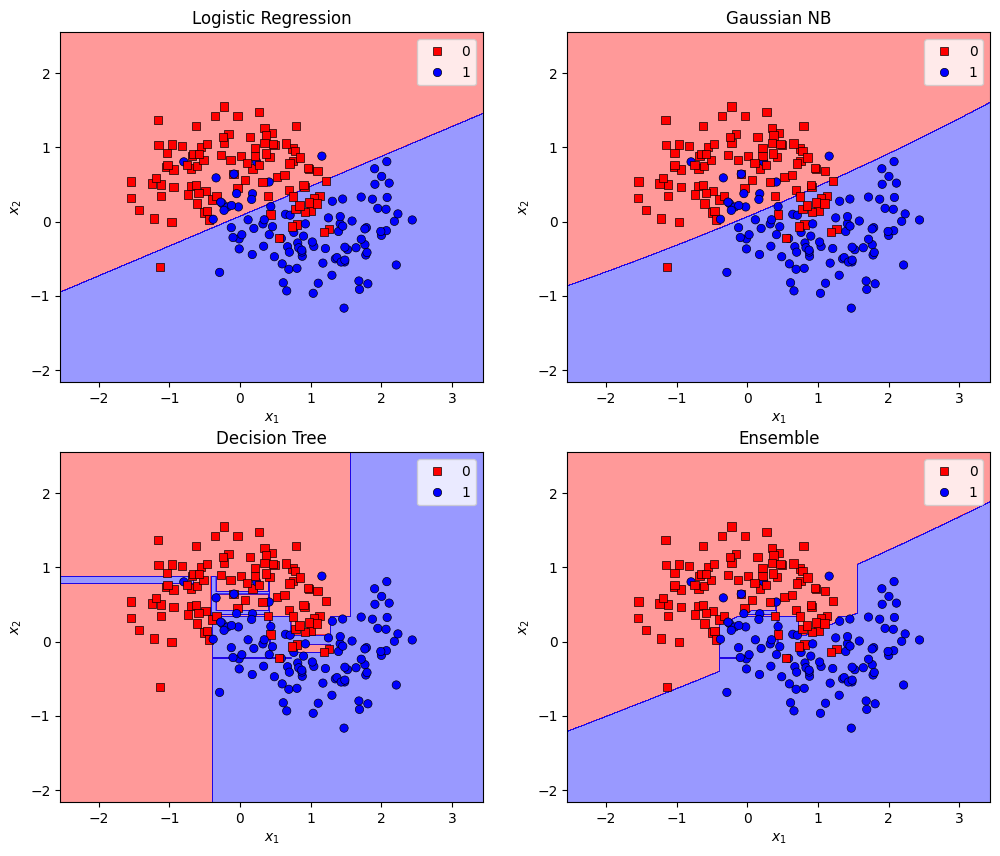

In [11]:
feature_names = ['$x_1$', '$x_2$']
class_names = np.array(['0', '1'])

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for clf, name, ax in zip(classifiers, names, axes.flat):
    clf.fit(X, y)
    plot_decision_boundaries(clf, X, y, feature_names, class_names, ax=ax)
    plt.title(name)